# Case Study on Regression

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [193]:
#Loading the dataset
car=pd.read_csv("/content/car_age_price.csv")

In [194]:
#Showing first five observations
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [195]:
#Info about the dataset
car.info()
#From the info we have two variables and 112 observations which are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [196]:
#Checking for missing values
car.isna().sum()

Year     0
Price    0
dtype: int64

In [197]:
#Since there is no missing values we can check for the distribution of the variables
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


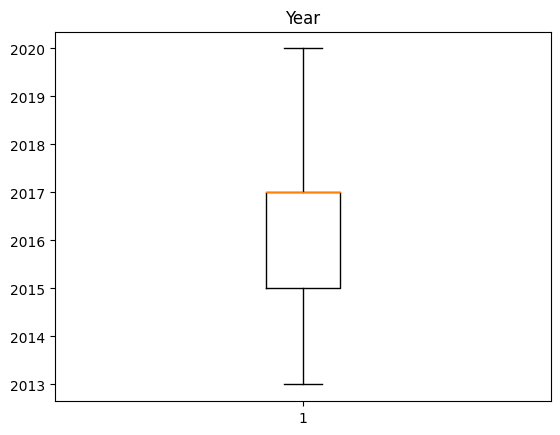

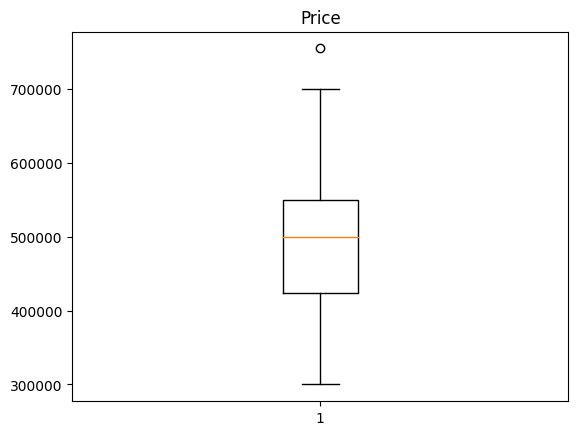

In [198]:
#Now we can check for Outliers
car1=["Year","Price"]

for i in car1:
  plt.figure()
  plt.boxplot(car[i])
  plt.title(i)

From the boxplot we can confirm that the variable 'Year' does not have an outlier but Price has a single outlier. so we need to find and it is better to remove that observation.    

In [199]:
#Finding the Quartiles
Q1=np.percentile(car['Price'],25,method='midpoint')
Q3=np.percentile(car['Price'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q3 is: ",Q3)

Q1 is:  422500.0
Q3 is:  550000.0


In [200]:
#Inter Quartile Range
IQR=Q3-Q1

In [201]:
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 741250.0


In [202]:
outlier=[]

for x in car['Price']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[755000]


In [203]:
#Finding the index of outlier
car.index[car['Price']==755000]

Int64Index([1], dtype='int64')

In [204]:
#The outlier observation
car.iloc[1,:]

Year       2019
Price    755000
Name: 1, dtype: int64

In [205]:
#Removing the outlier
car.drop(1,inplace=True)

In [206]:
#Checking Whether Outlier is removed
car.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [207]:
#Correlation matrix
car.corr()

,Year,Price
Year,1.000000,0.776449
Price,0.776449,1.000000


The Correlation between Price and Year is very high and positively related

From the problem here Price is the dependent variable and Year is the independent variable. Now we can go for Regression analysis.

In [208]:
#Assigning names for the dependent and independent variable
y=car['Price']
x=car['Year']

In [209]:
#Splitting the data set for testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [210]:
#Importing the linear model
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()

In [211]:
#Converting to array and reshaping
x_train=np.array(x_train).reshape(-1,1)

In [212]:
#Fitting the linear model
lin_model=lin_reg.fit(x_train,y_train)

In [213]:
#The slope Coefficient of the model
lin_model.coef_

array([39686.46221999])

In [214]:
#Intercept of the model
lin_model.intercept_

-79547503.55700439

In [215]:
#Converting x_test to array
x_test=np.array(x_test).reshape(-1,1)

In [216]:
#Predicting
lin_pred=lin_model.predict(x_test)

In [217]:
#Predicted value
lin_pred

array([420717.81628217, 539777.20294215, 420717.81628217, 420717.81628217,
       500090.74072215, 420717.81628217, 500090.74072215, 579463.66516215,
       619150.12738213, 500090.74072215, 420717.81628217, 381031.35406217,
       539777.20294215, 420717.81628217, 500090.74072215, 500090.74072215,
       500090.74072215, 341344.89184219, 460404.27850217, 579463.66516215,
       579463.66516215, 500090.74072215, 500090.74072215, 500090.74072215,
       500090.74072215, 500090.74072215, 460404.27850217, 420717.81628217])

In [218]:
#MSE value of the Linear regression model
from sklearn.metrics import mean_squared_error
print("MSE is:",mean_squared_error(y_test,lin_pred))

MSE is: 2718820563.0700393


In [219]:
#R-squared value of the Linear regression model
from sklearn.metrics import r2_score
print("R-squared:",r2_score(y_test,lin_pred))

R-squared: 0.6727697922780109


**Predicting the possible price of a 2022 model second-hand grand i10**

In [220]:
#Predicting the possible price of a 2022 model second-hand grand i10
lin_model.predict(np.array([2022]).reshape(-1,1))

array([698523.05182213])

 Hence the predicted value of of a 2022 model second-hand grand i10 is 698523.05182213

**Lasso Regression**

In [226]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=1.0)

In [227]:
las_model=lasso.fit(x_train,y_train)

In [228]:
las_pred=las_model.predict(x_test)

In [229]:
#MSE value of the Lasso regression model
from sklearn.metrics import mean_squared_error
print("MSE is:",mean_squared_error(y_test,las_pred))

MSE is: 2718839866.507089


In [230]:
#R-squared value of the Lasso regression model
from sklearn.metrics import r2_score
print("R-squared:",r2_score(y_test,las_pred))

R-squared: 0.6727674689662775


**Find out which one is performing better**


Both the model have almost same mean squared error and R-squared value so both the model are performing at the same level